In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Review of round-off and truncation errors

In [1]:
1e16 + 1

1e+16

In [20]:
def factorial(n):
  p = 1
  for i in range(2, n):
    p = p * i
  return p

def cos_approx(x, n):
  # Taylor Series Approx
  cos = 1
  powers = list(range(2, n, 2))
  for j, i in enumerate(powers):
    term = np.power(x, i) / factorial(i)
    term = np.power(-1, j+1) * term
    cos = cos + term
  return cos

In [30]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
cos1 = np.cos(x)
cos2 = cos_approx(x, 4)
cos3 = cos_approx(x, 20)
cos4 = cos_approx(x, 150)

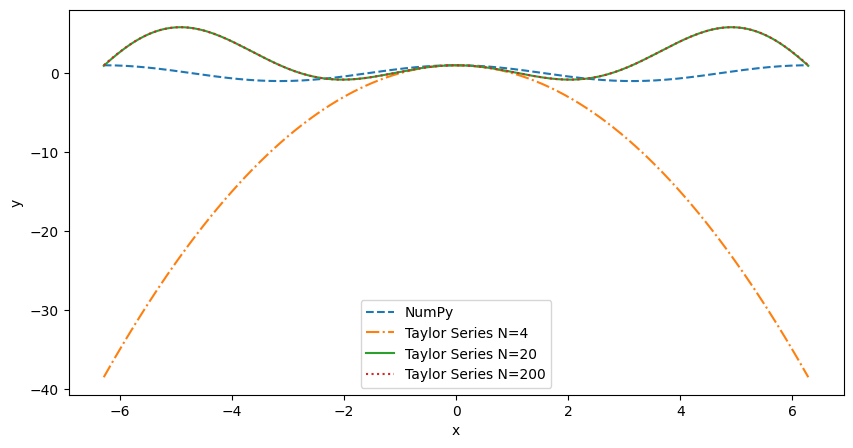

In [31]:
_ = plt.figure(figsize=(10, 5))
plt.plot(x, cos1, linestyle="--", label="NumPy")
plt.plot(x, cos2, linestyle="-.", label="Taylor Series N=4")
plt.plot(x, cos3, linestyle="-", label="Taylor Series N=20")
plt.plot(x, cos4, linestyle=":", label="Taylor Series N=200")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [15]:
cos2.shape

()

In [32]:
factorial(150)

380892263763056972698595524350736933545970238573408427883655838887865527498969322620843829924502074302514052524979028027751108334657896696442372994639480443832950613971571859528835715269633083149369445271480789636247481797836800000000000000000000000000000000000

In [33]:
np.power(np.pi, 150) / factorial(150)

9.810220123093774e-187

In [34]:
np.power(np.pi, 148) / factorial(148)

2.1919315644564838e-183

### Iterative methods & Root Finding Methods

Find x such that f(x) = 0

In [35]:
def bisection_method(f, a, b, tolerance, max_iterations):
  if f(a) * f(b) >= 0:
    print("Bisection method fails.")
    return None

  a_n = a
  b_n = b
  for n in range(1, max_iterations+1):
    m_n = (a_n + b_n) / 2
    f_m_n = f(m_n)
    if abs(f_m_n) < tolerance:
      print(f"Found solution after {n} iterations")
      return m_n
    elif f(a_n) * f_m_n < 0:
      b_n = m_n
    elif f(b_n) * f_m_n < 0:
      a_n = m_n
    else:
      print("Bisection method fails.")
      return None

  print("Exeeded maximum iterations. No solution found.")
  return None

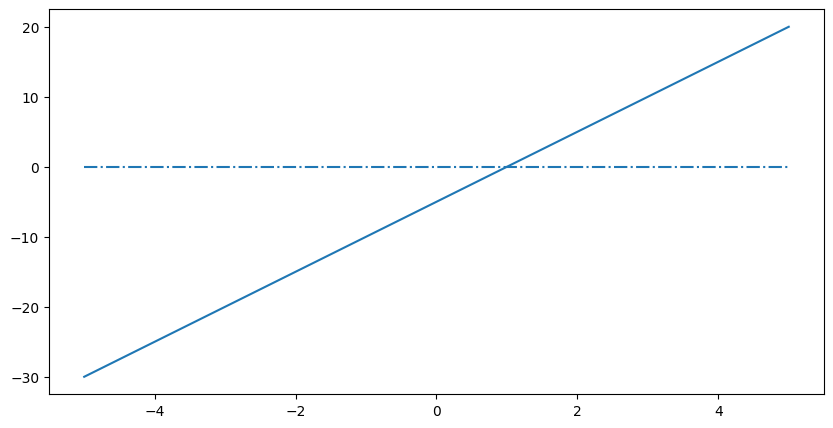

In [45]:
def f(x, a, b):
  return a*x + b

x = np.linspace(-5, 5, 100)

a = 5
b = -5
y = f(x, a, b)

_ = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.hlines(0, x[0], x[-1], linestyle="-.")
plt.show()

In [47]:
from functools import partial
f1 = partial(f, a=a, b=b)

x0 = bisection_method(f1, -1, 3, 0.01, 200)
print(x0)

Found solution after 1 iterations
1.0


In [53]:
def newton_method(f, x0, tolerance, max_iterations):
  solutions = [x0]
  xn = x0
  for n in range(max_iterations):
    fxn = f(xn)
    if abs(fxn) < tolerance:
      print(f"Found a solution after {n} iterations.")
      return solutions

    dfxn = (f(xn+0.01) - f(xn)) / 0.01

    if dfxn == 0:
      print("Zero derivative. No solution found.")
      return solutions

    xn = xn - fxn / dfxn
    solutions.append(xn)

  print("Execeeded maximum number of iterations.")
  return solutions

In [67]:
def g(x):
  return -x**2 - 4*x + 5*np.sin(x) + 20

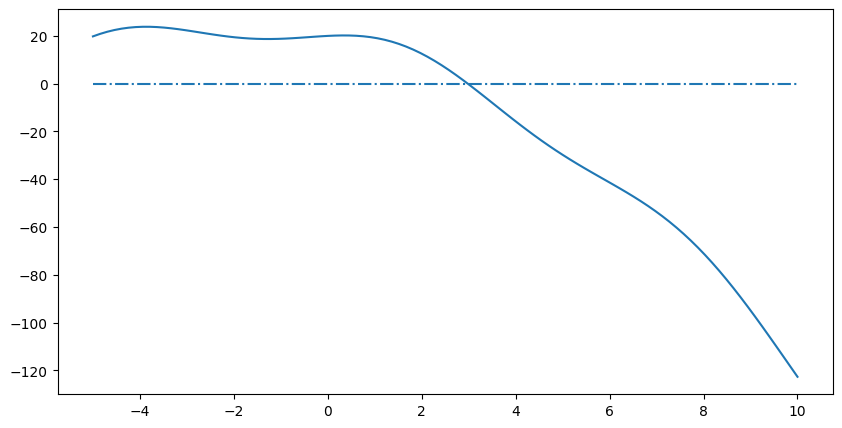

In [81]:
x = np.linspace(-5, 10, 100)
y = g(x)

_ = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.hlines(0, x[0], x[-1], linestyle="-.")
plt.show()

In [82]:
solutions = newton_method(g, -2, 0.00001, 100)

Found a solution after 5 iterations.


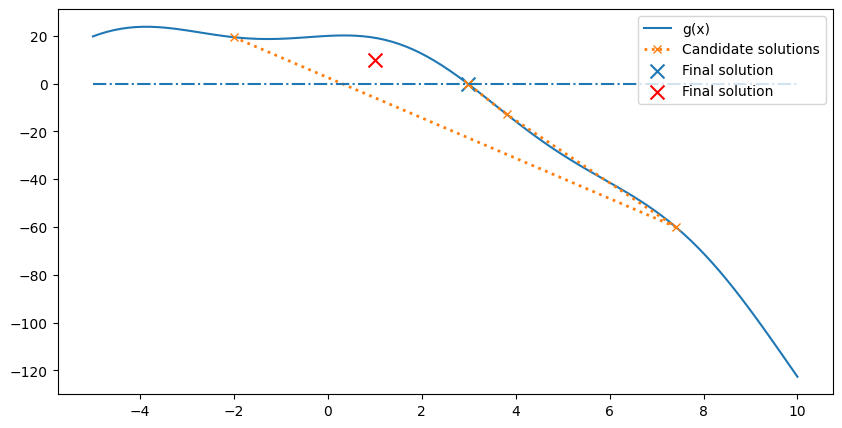

In [87]:
y_solutions = [g(xi) for xi in solutions]

_ = plt.figure(figsize=(10, 5))
plt.plot(x, y, label="g(x)")
plt.plot(solutions, y_solutions, linestyle=":", linewidth=2, marker="x", label="Candidate solutions")
plt.scatter(solutions[-1], g(solutions[-1]), s=100, marker="x", label="Final solution")
plt.scatter(1, 10, s=100, marker="x", label="Final solution", c="red")
plt.hlines(0, x[0], x[-1], linestyle="-.")
plt.legend()
plt.show()

### Gradient descent

In [99]:
def gradient_descent_1d(f, df, initial_guess, learning_rate, max_iterations, tolerance):
  steps = [initial_guess]
  x_current = initial_guess
  for _ in range(max_iterations):
    gradient = df(x_current)
    x_next = x_current - learning_rate * gradient

    steps.append(x_next)

    if abs(x_next - x_current) < tolerance:
      return x_next, steps

    x_current = x_next

  return x_current, steps

In [100]:
def h(x):
  return x**2 + 4*x + 20

def dh(x):
  return 2*x + 4

initial_guess = 10
learning_rate = 0.1
max_iterations = 1000
tolerance = 1e-6

x_min, steps = gradient_descent_1d(h, dh, initial_guess, learning_rate, max_iterations, tolerance)

In [101]:
x_min, h(x_min)

(-1.9999961433486937, 16.000000000014875)

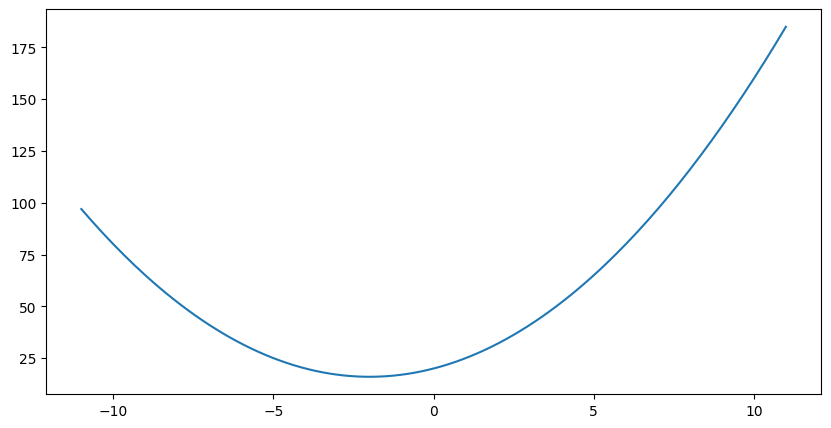

In [102]:
x = np.linspace(-11, 11, 200)
_ = plt.figure(figsize=(10, 5))
plt.plot(x, h(x))
plt.show()

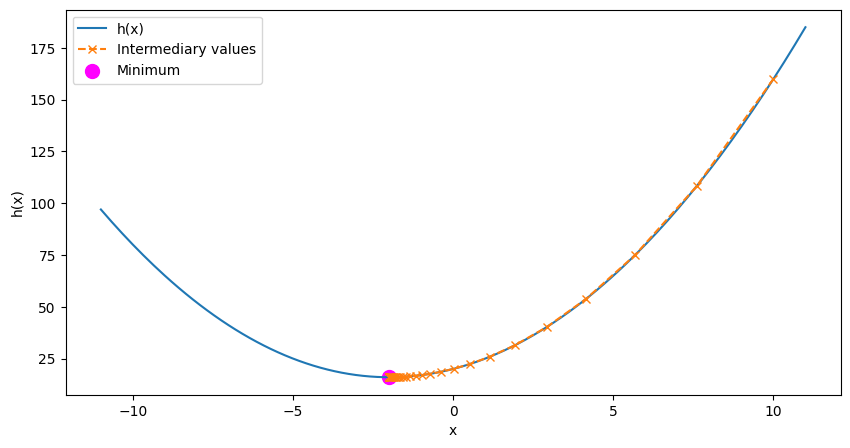

In [104]:
x = np.linspace(-11, 11, 200)

intermediary_values = [h(xi) for xi in steps]

_ = plt.figure(figsize=(10, 5))
plt.plot(x, h(x), label="h(x)")
plt.plot(steps, intermediary_values, linestyle="--", label="Intermediary values", marker="x")
plt.scatter(x_min, h(x_min), s=100, c="magenta", label="Minimum")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.legend()
plt.show()

In [105]:
def gradient_descent_2d(f, grad, initial_guess, learning_rate, max_iterations, tolerance):
  x_current, y_current = initial_guess
  for _ in range(max_iterations):
    grad_x, grad_y = grad(x_current, y_current)
    x_next = x_current - learning_rate * grad_x
    y_next = y_current - learning_rate * grad_y

    if np.sqrt((x_next - x_current)**2 + (y_next - y_current)**2) < tolerance:
      return x_next, y_next

    x_current, y_current = x_next, y_next

  return x_current, y_current

In [107]:
def f(x, y):
  return x**2 + y**2

def grad_f(x, y):
  return 2*x, 2*y

initial_guess = (10, 10)
learning_rate = 0.1
max_iterations = 1000
tolerance = 1e-6

x_min, y_min = gradient_descent_2d(f, grad_f, initial_guess, learning_rate, max_iterations, tolerance)
x_min, y_min, f(x_min, y_min)

(2.5711008708143856e-06, 2.5711008708143856e-06, 1.3221119375804984e-11)